In [221]:
import sys
import gym
import numpy as np
from collections import defaultdict
environment = gym.make('Blackjack-v1')
print(environment.observation_space)
print(environment.action_space)

Tuple(Discrete(32), Discrete(11), Discrete(2))
Discrete(2)


In [222]:
environment.observation_space, environment.action_space

(Tuple(Discrete(32), Discrete(11), Discrete(2)), Discrete(2))

In [223]:
card_sum, dearler_card, is_ace =  (environment.observation_space)

In [224]:
card_sum, dearler_card, is_ace

(Discrete(32), Discrete(11), Discrete(2))

In [225]:
def generate_episode(environment: gym.Env):
    state = environment.reset()
    episode = []
    while True:
        #action = environment.action_space.sample()
        player_score, dealer_card, is_ace = state
        probs = [0.75, 0.25] if player_score > 18 else [0.25, 0.75]
        action = np.random.choice(np.arange(environment.action_space.n), p = probs)
        next_state, reward, is_done, _ = environment.step(action)
        episode.append((state,action,reward))
        if is_done:
            break
        state = next_state
    return episode



In [226]:
EPISODES_COUNT = 10
episodes = []
for i in range(EPISODES_COUNT):
    episode = generate_episode(environment)
    print("Episode: ", episode)
    episodes.append(episode)

Episode:  [((17, 10, False), 1, 0.0), ((21, 10, False), 0, 1.0)]
Episode:  [((9, 9, False), 1, 0.0), ((19, 9, False), 0, 1.0)]
Episode:  [((21, 4, True), 1, 0.0), ((12, 4, False), 1, -1.0)]
Episode:  [((13, 10, False), 1, 0.0), ((19, 10, False), 1, -1.0)]
Episode:  [((14, 8, False), 1, -1.0)]
Episode:  [((11, 6, False), 1, 0.0), ((15, 6, False), 1, -1.0)]
Episode:  [((12, 7, False), 0, 1.0)]
Episode:  [((16, 1, True), 0, -1.0)]
Episode:  [((6, 6, False), 1, 0.0), ((9, 6, False), 1, 0.0), ((20, 6, True), 1, 0.0), ((19, 6, False), 0, 1.0)]
Episode:  [((15, 10, False), 1, 0.0), ((17, 10, False), 1, -1.0)]


In [227]:
episode = generate_episode(environment)
print(episode)
states, actions, rewards = zip(*episode)
print(states)
print(actions)
print(rewards)

[((13, 5, False), 1, -1.0)]
((13, 5, False),)
(1,)
(-1.0,)


In [228]:
GAMMA = 0.8
total_episodes = 1000000
def monte_carlo_predictions(environment: gym.Env,total_episodes: int = 100):
    returns_sum = defaultdict(lambda: np.zeros(environment.action_space.n))
    N = defaultdict(lambda: np.zeros(environment.action_space.n))
    Q = defaultdict(lambda: np.zeros(environment.action_space.n))

    for episode_count in range(1, total_episodes+1):
        episode = generate_episode(environment)
        states, actions, rewards = zip(*episode)

        if episode_count % 10000 == 0: # monitor progress
            print(f"\rEpisode {episode_count}/{total_episodes}.episode = {episode}", end="")
            sys.stdout.flush()

        for i, state in enumerate(states):
            reward, action = rewards[i], actions[i]
            #print(i, state, reward, action)
            discounts = np.array([GAMMA**i for i in range( len(rewards)  + 1)])
            discounted_return = np.dot(rewards[i:], discounts[ : -(i+1)])
            #print(discounted_return, rewards[i:], discounts[: (i+1) ])

            N[state][action] += 1.0
            returns_sum[state][action] = discounted_return
            Q[state][action] = returns_sum[state][action]/N[state][action]
            #print("Action Value function: ", Q[state])
    return Q

Q = monte_carlo_predictions(environment,total_episodes)
for item in Q.items():
    print(item)


Episode 1000000/1000000.episode = [((10, 10, False), 0, -1.0)]8, 7, False), 1, -1.0)]0)](12, 10, False), 1, 0.0), ((14, 10, False), 1, 0.0), ((20, 10, False), 1, -1.0)]((16, 6, False), array([-0.00043346, -0.00015044]))
((21, 6, False), array([ 0.000258  , -0.00072202]))
((13, 5, False), array([ 4.71475719e-04, -9.78892628e-05]))
((17, 5, False), array([ 0.       , -0.0001506]))
((10, 10, False), array([-2.75330396e-04, -7.39576592e-05]))
((16, 10, False), array([-1.13147771e-04, -3.81679389e-05]))
((8, 8, False), array([-0.00154799, -0.00043597]))
((10, 8, False), array([-0.00111982, -0.00030143]))
((20, 8, False), array([ 0.00010989, -0.00032237]))
((18, 6, False), array([ 0.00046083, -0.0001543 ]))
((20, 2, False), array([ 0.00011068, -0.00032765]))
((13, 9, False), array([0.00049334, 0.        ]))
((21, 9, False), array([ 0.00025342, -0.00076628]))
((21, 2, True), array([0.00031027, 0.00076923]))
((13, 2, False), array([-0.00046168, -0.00012471]))
((18, 2, False), array([-0.0004612

In [229]:
State_Value_table={}
for state, actions in Q.items():
     #print( (state[0] > 18)* ( np.dot([0.75, 0.25], actions) ) )
     State_Value_table[state]= (state[0]>18)*(np.dot([0.75, 0.25],actions)) + (state[0]<=18)*(np.dot([0.75, 0.25],actions))
State_Value_table

{(16, 6, False): -0.0003627084815680901,
 (21, 6, False): 1.2993036849929022e-05,
 (13, 5, False): 0.0003291344735574812,
 (17, 5, False): -3.765060240963856e-05,
 (10, 10, False): -0.0002249872121668495,
 (16, 10, False): -9.440281297450806e-05,
 (8, 8, False): -0.0012699825376873825,
 (10, 8, False): -0.0009152235717643128,
 (20, 8, False): 1.8244167180337387e-06,
 (18, 6, False): 0.0003070478257252501,
 (20, 2, False): 1.097015320498918e-06,
 (13, 9, False): 0.000370004933399112,
 (21, 9, False): -1.5049917176907337e-06,
 (21, 2, True): 0.00042501014344017757,
 (13, 2, False): -0.0003774373168841207,
 (18, 2, False): -0.0003842023613073596,
 (15, 8, False): -0.00031112043439145224,
 (9, 10, False): -0.00027195038761536263,
 (19, 10, False): -6.536666363457096e-08,
 (17, 8, False): -0.0003153585881091571,
 (17, 10, False): -9.551828219921294e-06,
 (16, 2, True): -0.002187108671567407,
 (13, 10, False): 7.822736591714157e-05,
 (15, 5, False): 0.0003130575797495372,
 (20, 5, False): -0

In [230]:
#source: https://github.com/udacity/deep-reinforcement-learning/blob/master/monte-carlo/plot_utils.py

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_blackjack_values(V):

    def get_Z(x, y, usable_ace):
        if (x,y,usable_ace) in V:
            return V[x,y,usable_ace]
        else:
            return 0

    def get_figure(usable_ace, ax):
        x_range = np.arange(11, 22)
        y_range = np.arange(1, 11)
        X, Y = np.meshgrid(x_range, y_range)
        
        Z = np.array([get_Z(x,y,usable_ace) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, vmin=-1.0, vmax=1.0)
        ax.set_xlabel('Player\'s Current Sum')
        ax.set_ylabel('Dealer\'s Showing Card')
        ax.set_zlabel('State Value')
        ax.view_init(ax.elev, -120)

    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(211, projection='3d')
    ax.set_title('Usable Ace')
    get_figure(True, ax)
    ax = fig.add_subplot(212, projection='3d')
    ax.set_title('No Usable Ace')
    get_figure(False, ax)
    plt.show()

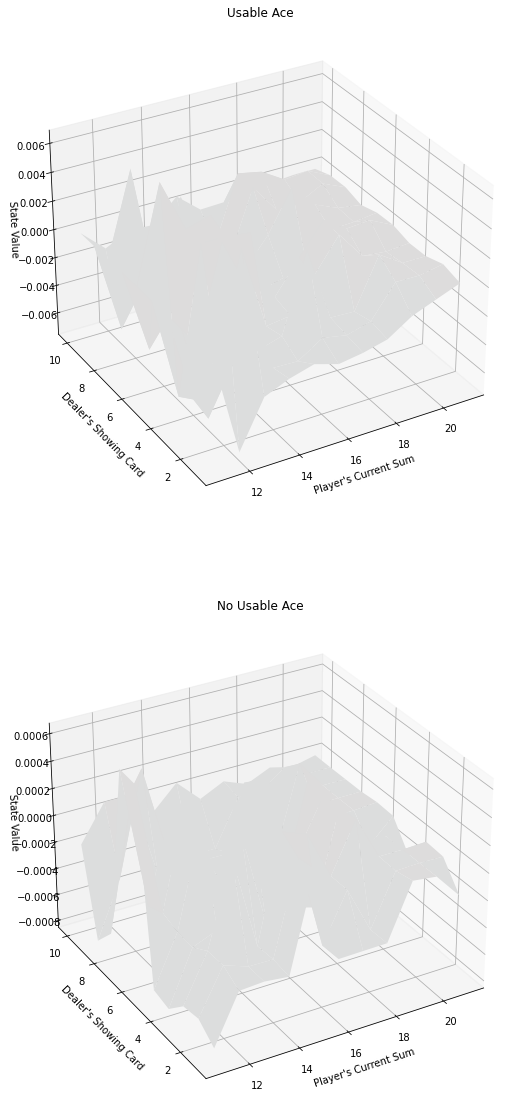

In [231]:
plot_blackjack_values(State_Value_table)